# MSU Curriculum Graph with YOUR API

This notebook shows how to create graphs using your `curriculum_core` API with **REAL MSU DATA**.

No fake data needed - this uses your actual prerequisite extraction!

## Step 1: Import Packages

In [2]:
import curriculum_core as api
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

## Step 2: Load Real MSU Data

In [3]:
# Load the actual MSU registrar data
api.load_data(
    "20250919_Registrars_Data(in).csv",
    "CNS_Majors_Data.xlsx"
)

Loading registrar data from 20250919_Registrars_Data(in).csv...
Loading majors data from CNS_Majors_Data.xlsx...
Extracting prerequisites...
Loaded 20101 courses, 1717 with prerequisites


## Step 3: Get Graph Data for a Major

Let's visualize the Chemistry BS program

In [16]:
majors_df = pd.read_excel("CNS_Majors_Data.xlsx")
print("Majors:", majors_df['Major'].unique()[:20])
graph_data = api.get_graph_data(major="7105")

print(f"Chemistry BS Program:")
print(f"  Courses: {len(graph_data['nodes'])}")
print(f"  Prerequisites: {len(graph_data['edges'])}")

Majors: [7105 7114 7108 3822 7021 7024 3784 3830 3576 3579 3753 3756 3965 7059
 3946 3930 7062 3904 3969 7132]
Chemistry BS Program:
  Courses: 34
  Prerequisites: 17


## Step 4: Create NetworkX Graph

In [ ]:
G = nx.DiGraph()

for node in graph_data['nodes']:
    G.add_node(
        node['id'],
        title=node['title'],
        year=node['year'],
        depth=node['depth']
    )

# Add edges (prerequisite relationships)
for edge in graph_data['edges']:
    G.add_edge(edge['source'], edge['target'])

print(f"Graph created: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Graph created: 34 nodes, 16 edges


## Step 5: Simple Graph Visualization

/var/folders/90/14yqyrnj6_5dfglmq5jz_s2w0000gn/T/ipykernel_2926/2647371957.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


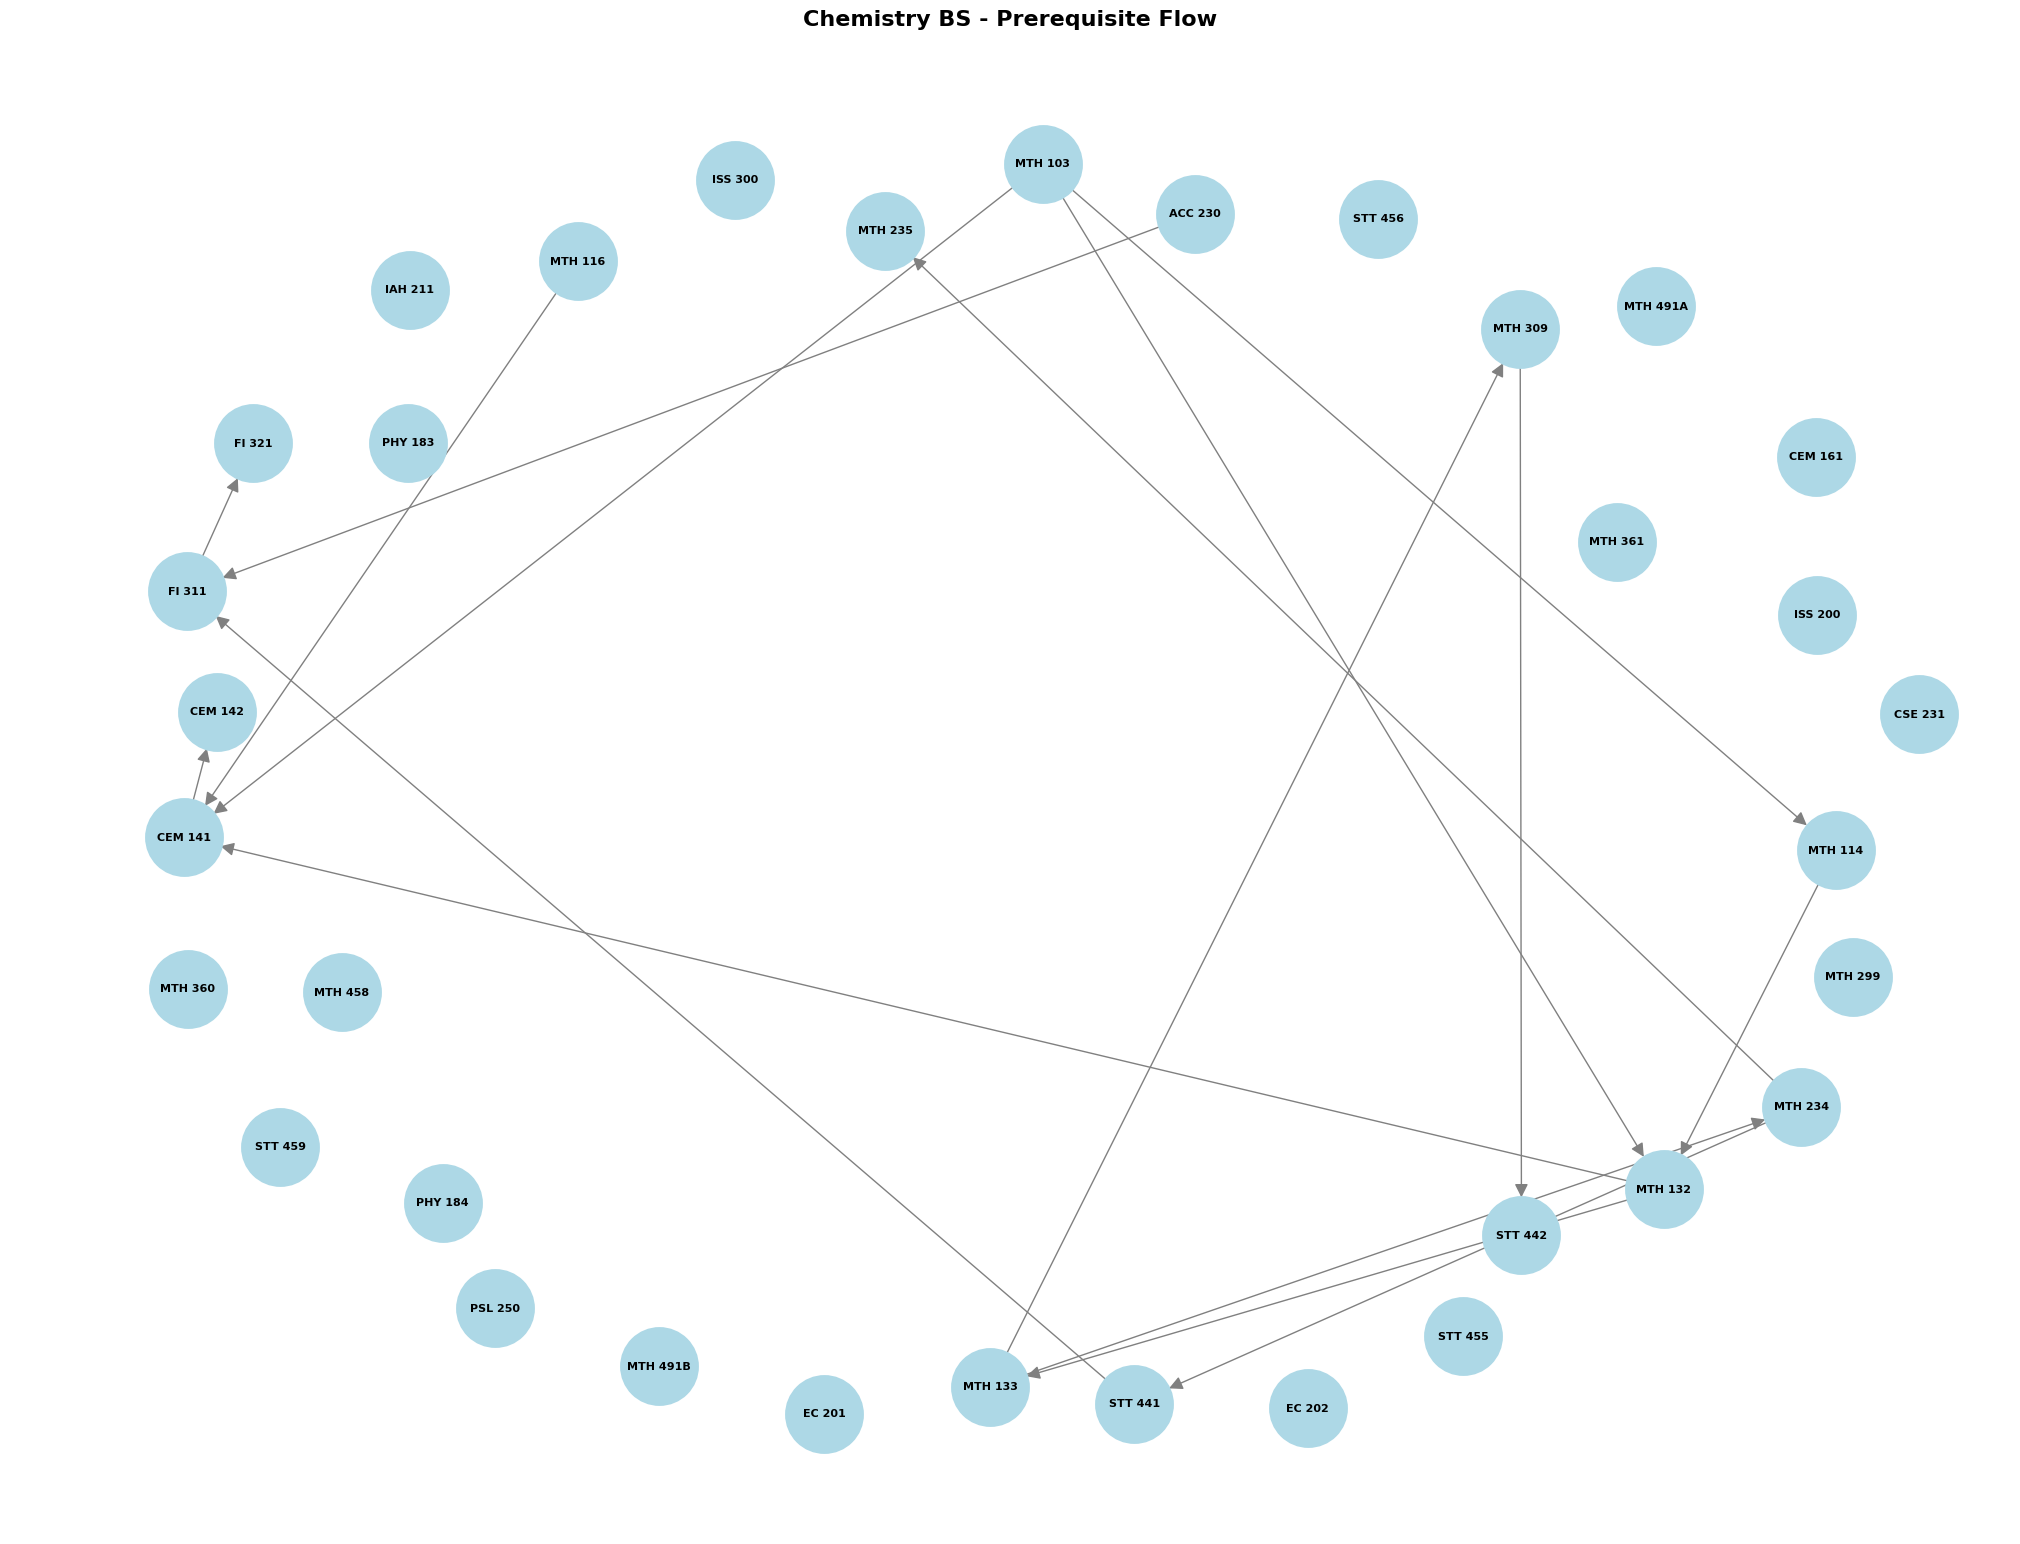

In [ ]:
plt.figure(figsize=(20, 15))

pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=3000,
    font_size=8,
    font_weight='bold',
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    linewidths=2
)

plt.title("Chemistry BS - Prerequisite Flow", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig("chemistry_graph.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 6: Color by Year Level

/var/folders/90/14yqyrnj6_5dfglmq5jz_s2w0000gn/T/ipykernel_2926/2371456295.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


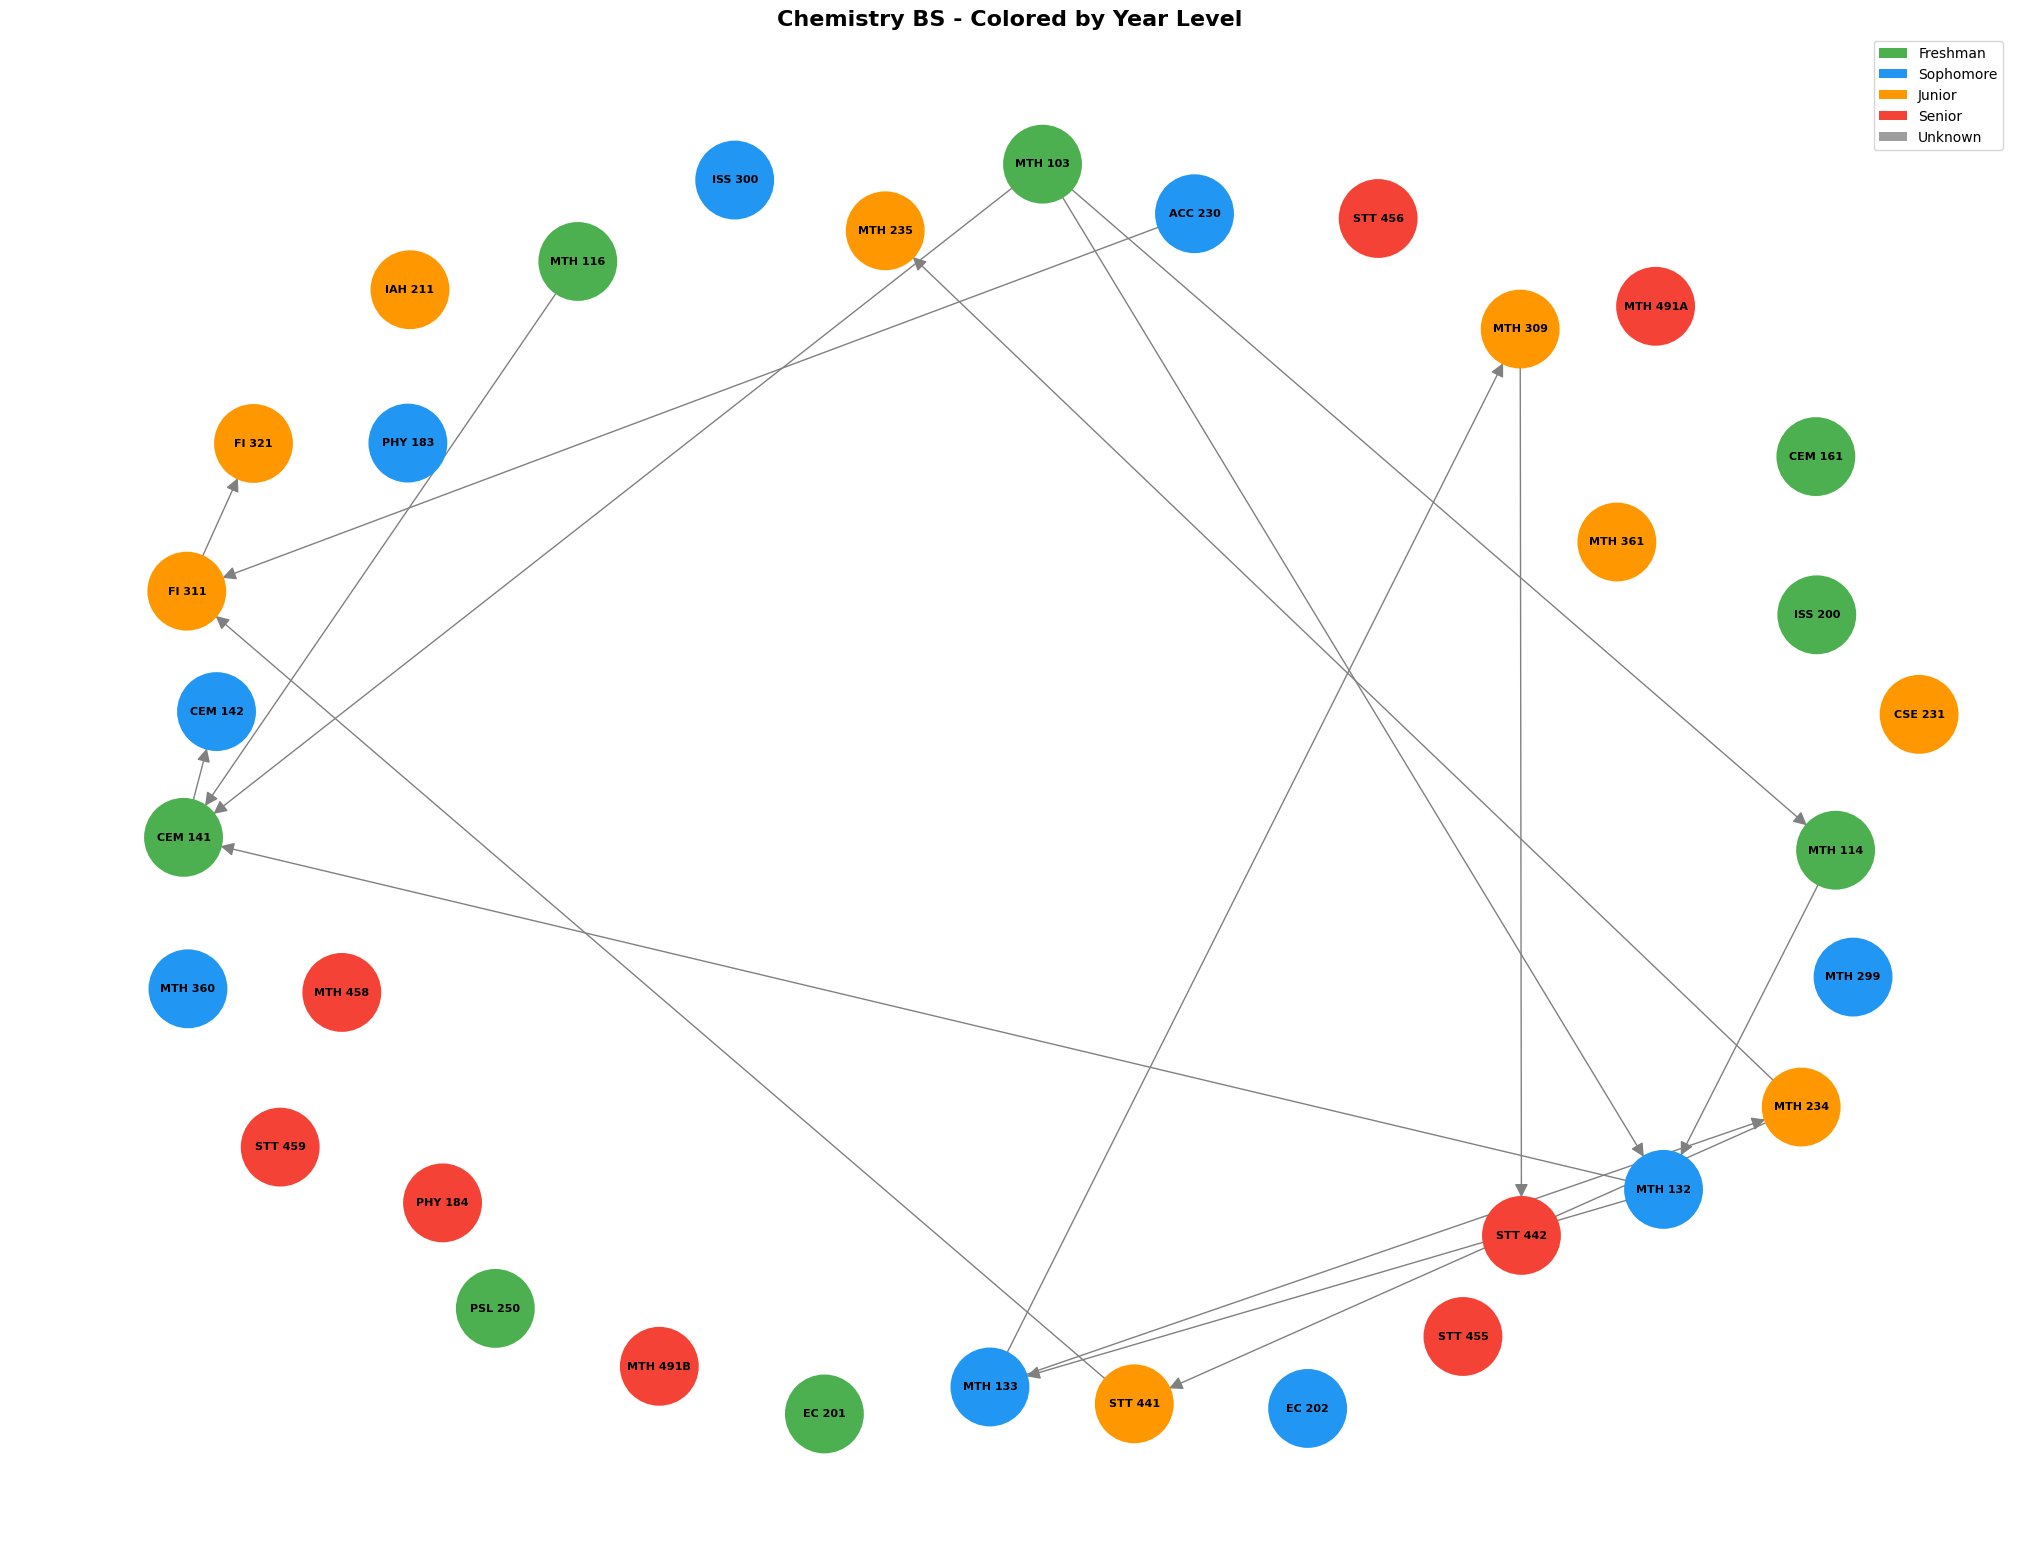

In [ ]:
year_colors = {
    'Freshman': '#4CAF50',
    'Sophomore': '#2196F3',
    'Junior': '#FF9800',
    'Senior': '#F44336',
    'Unknown': '#9E9E9E'
}

node_colors = []
for node_id in G.nodes():
    node_data = [n for n in graph_data['nodes'] if n['id'] == node_id][0]
    year = node_data['year']
    node_colors.append(year_colors.get(year, '#9E9E9E'))

plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=3000,
    font_size=8,
    font_weight='bold',
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    linewidths=2
)

plt.title("Chemistry BS - Colored by Year Level", fontsize=16, fontweight='bold')
plt.axis('off')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=year) 
                   for year, color in year_colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig("chemistry_graph_colored.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 7: Hierarchical Layout

/var/folders/90/14yqyrnj6_5dfglmq5jz_s2w0000gn/T/ipykernel_2926/2353590745.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


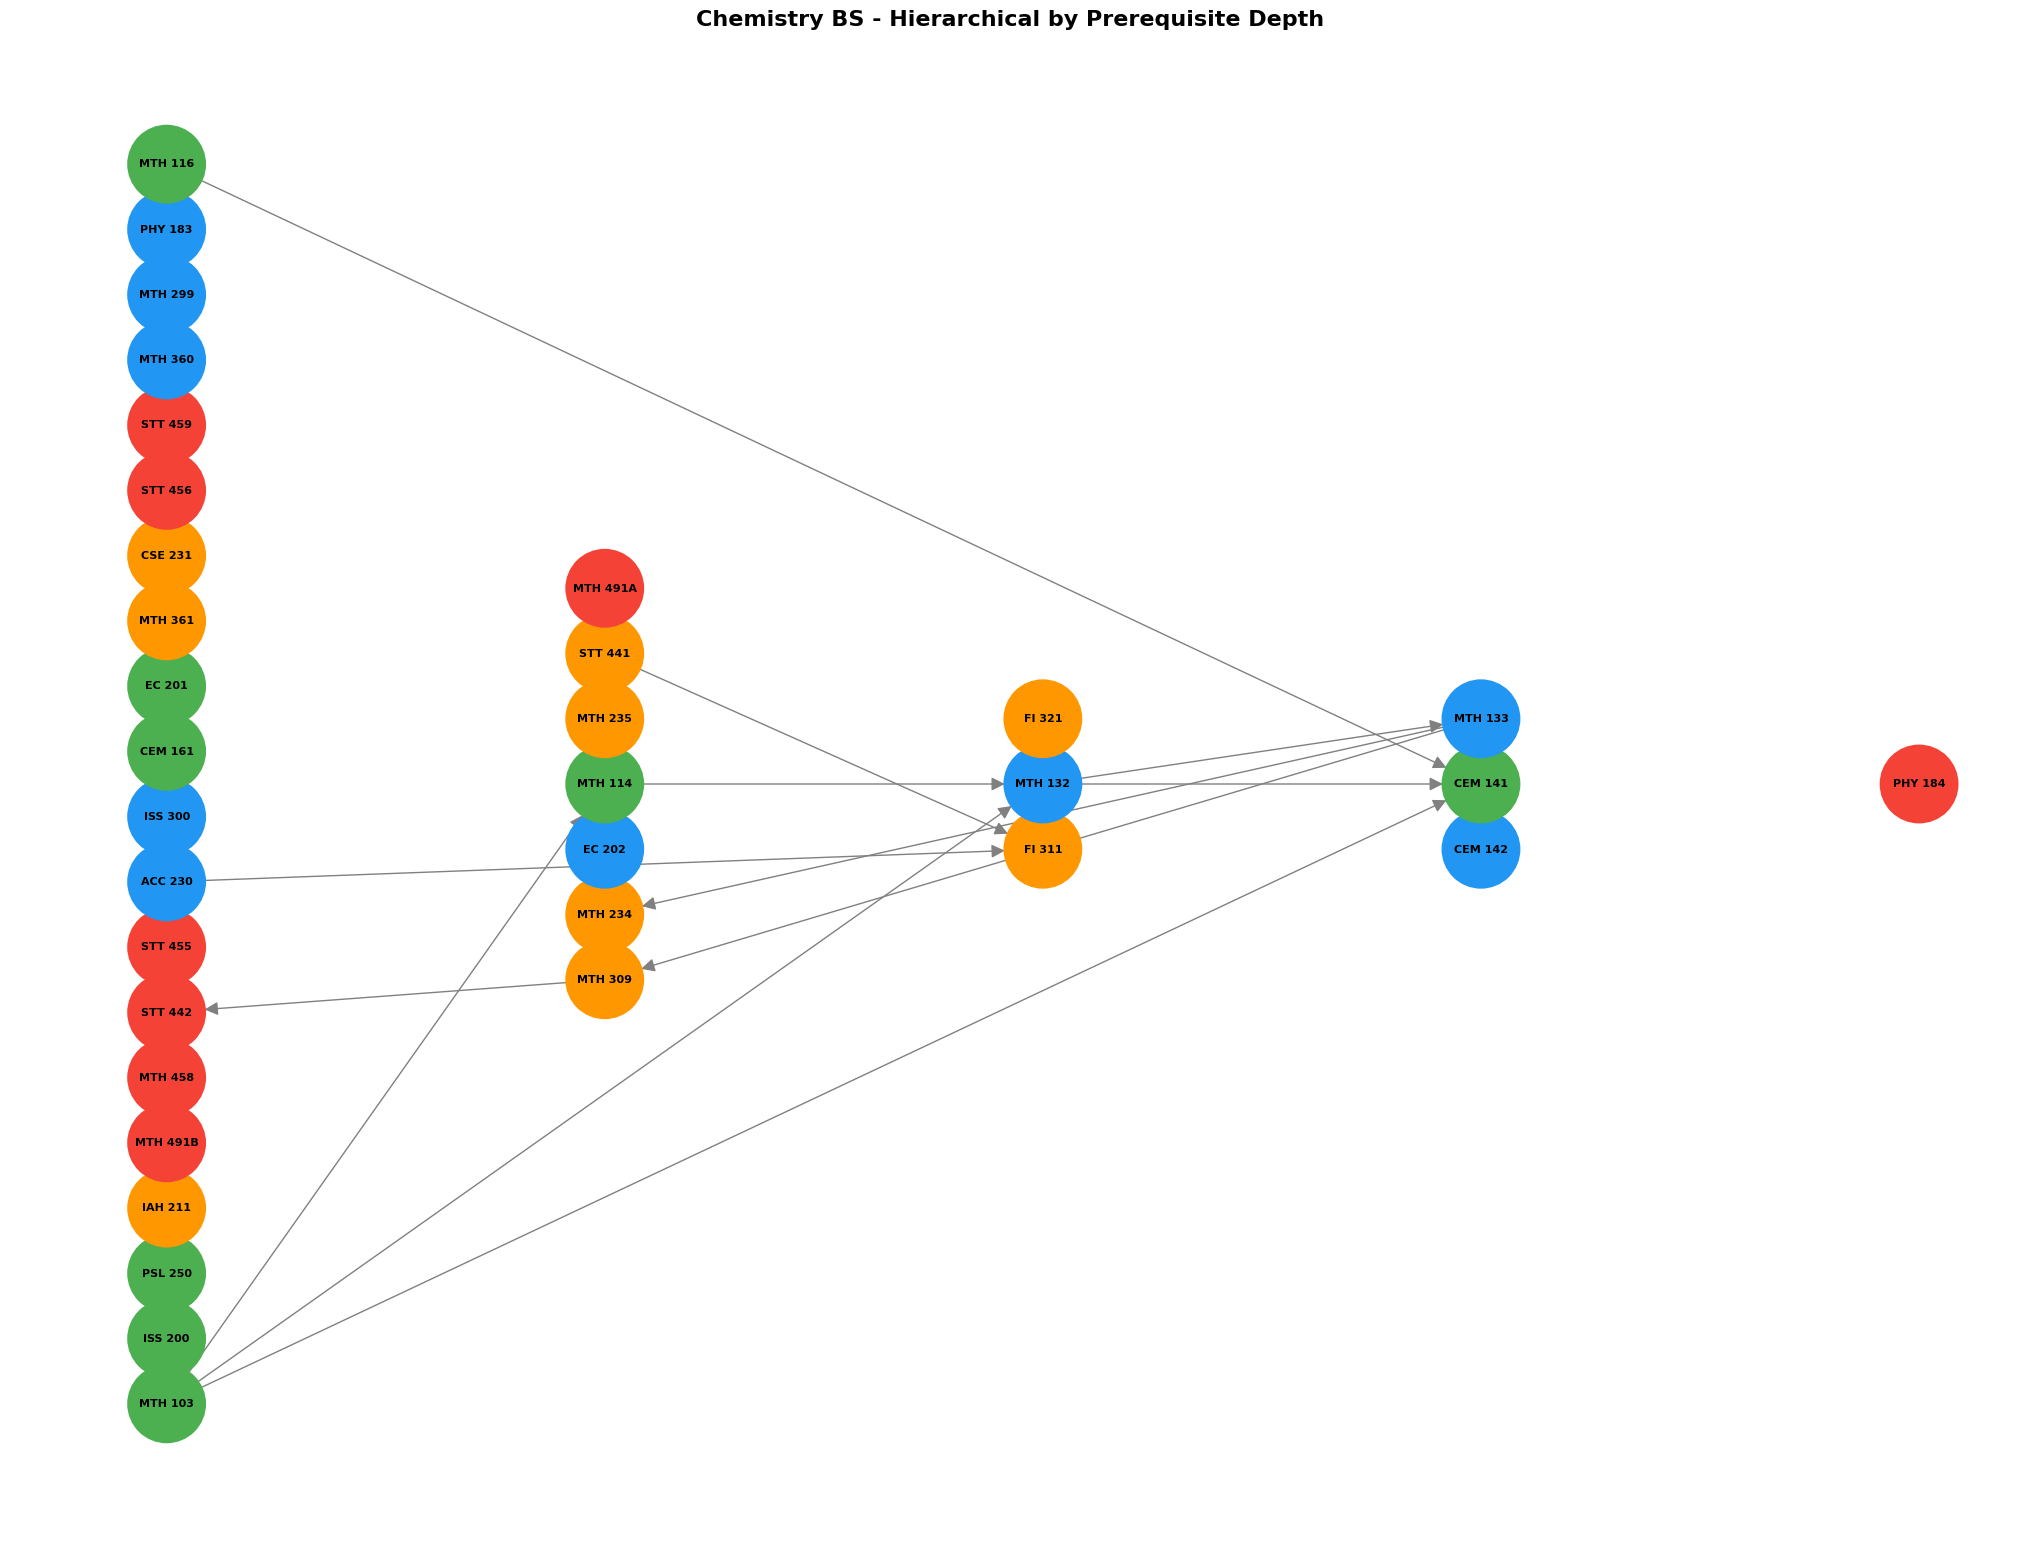

In [ ]:
plt.figure(figsize=(20, 15))

pos = {}
depth_groups = {}

# Group by depth
for node_id in G.nodes():
    node_data = [n for n in graph_data['nodes'] if n['id'] == node_id][0]
    depth = node_data['depth']
    if depth not in depth_groups:
        depth_groups[depth] = []
    depth_groups[depth].append(node_id)

# Position nodes
for depth, nodes in depth_groups.items():
    for i, node_id in enumerate(nodes):
        x = depth * 3  # Horizontal position by depth
        y = i - len(nodes) / 2  # Vertical position
        pos[node_id] = (x, y)

nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=3000,
    font_size=8,
    font_weight='bold',
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    linewidths=2
)

plt.title("Chemistry BS - Hierarchical by Prerequisite Depth", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig("chemistry_graph_hierarchical.png", dpi=300, bbox_inches='tight')
plt.show()

## Step 8: Explore Different Majors

In [ ]:
majors = api.get_major_list()

print("Available majors:")
for major in majors[:10]:  # Show first 10
    print(f"  {major['code']}: {major['courses']} courses")

Available majors:
  3576: 72 courses
  3579: 75 courses
  3742: 100 courses
  3744: 99 courses
  3753: 102 courses
  3756: 99 courses
  3769: 154 courses
  3784: 160 courses
  3802: 73 courses
  3822: 37 courses


In [ ]:
# Try a different major - change this!
MAJOR_CODE = "PHYSBS"  # Physics BS

# Get graph data
graph_data = api.get_graph_data(major=MAJOR_CODE)

# Create graph
G = nx.DiGraph()
for node in graph_data['nodes']:
    G.add_node(node['id'])
for edge in graph_data['edges']:
    G.add_edge(edge['source'], edge['target'])

# Draw
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, k=3, iterations=50)
nx.draw(G, pos, with_labels=True, node_color='lightcoral', 
        node_size=3000, font_size=8, arrows=True, arrowsize=20)
plt.title(f"{MAJOR_CODE} - Prerequisite Flow")
plt.axis('off')
plt.show()

print(f"{MAJOR_CODE}: {G.number_of_nodes()} courses, {G.number_of_edges()} prerequisites")

## Step 9: Analyze Prerequisite Chains

In [ ]:
# Find courses with most prerequisites
prereq_counts = {}
for node in graph_data['nodes']:
    prereq_counts[node['id']] = G.in_degree(node['id'])

# Sort by prerequisite count
top_prereqs = sorted(prereq_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Courses with most prerequisites:")
for course_id, count in top_prereqs:
    prereqs = api.get_prerequisites(course_id)
    print(f"\n{course_id}: {count} prerequisites")
    print(f"  {prereqs['formatted']}")

## Step 10: Find Foundational Courses

In [5]:
# Find courses that many other courses depend on
for node_id in G.nodes():
    dependents = api.get_dependent_courses(node_id)
    if len(dependents) > 0:
        print(f"{node_id} is required by {len(dependents)} courses")

NameError: name 'G' is not defined